In [1]:
import matplotlib

# matplotlib.use("Agg")

import time
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from KDEpy import NaiveKDE, TreeKDE,FFTKDE

In [2]:
n = 16
gen_random = lambda n: np.random.randn(n).reshape(-1, 1)
data1 = np.concatenate((gen_random(n), gen_random(n)), axis=1)
data2 = np.concatenate((gen_random(n) + 1, gen_random(n) + 4), axis=1)
data = np.concatenate((data1, data2))

grid_points = 2**7  # Grid points in each dimension
N = 8  # Number of contours
xy, z = FFTKDE(bw=1).fit(data)((grid_points, grid_points))
xy.shape, z.shape

((16384, 2), (16384,))

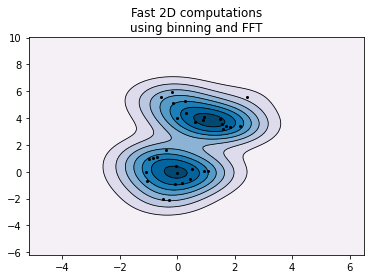

In [3]:
plt.title("Fast 2D computations\nusing binning and FFT", fontsize=12)

x, y = np.unique(xy[:, 0]), np.unique(xy[:, 1])
z = z.reshape(grid_points, grid_points).T
plt.contour(x, y, z, N, linewidths=0.8, colors="k")
plt.contourf(x, y, z, N, cmap="PuBu")
plt.plot(data[:, 0], data[:, 1], "ok", ms=2)
# plt.yticks([])
# plt.xticks([])

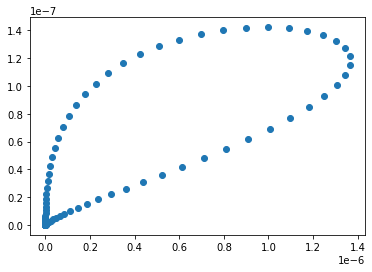

In [4]:
plt.figure()
plt.scatter(z[:,0], z[:1])